# Similarity on Time Series: Dynamic Time Warping (DTW)

## Basic Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt # Plotting
import seaborn as sns # Plotting
import colorcet as cc # For nice colorpalettes
colors = cc.glasbey

## Data construction

Construct a straigh line, and two cosine waves, one with more periodicity than the other one.

In [2]:
# Wave sizes
n_x = 20
n_y = 10

# Construct wave data
x = np.cos((n_y/n_x)*np.array(range(n_x)))
y = np.cos(range(n_y))
z = np.array([0]*n_y)

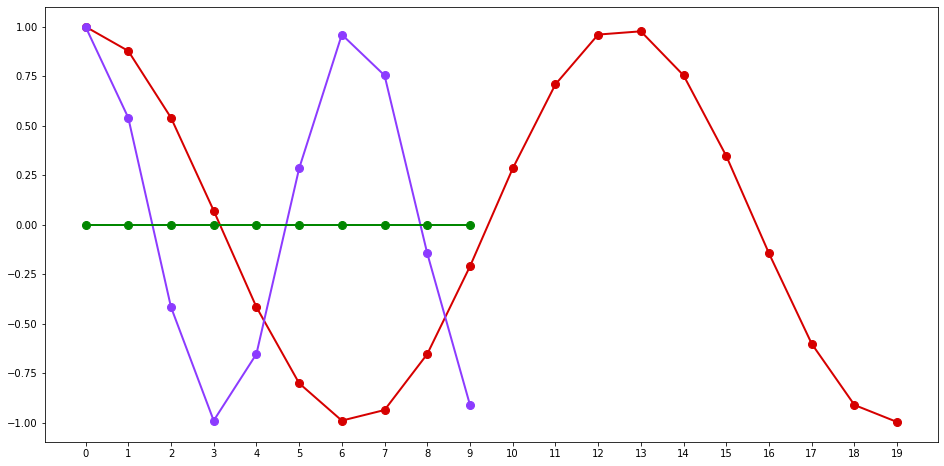

In [3]:
# Prepare figure
fig, ax = plt.subplots(figsize=(16,8))

# Plot series
ax.set_xticks(np.arange(0, 20, 1))
ax.plot(x, '-o', label='x', linewidth=2, markersize=8, color=colors[0], markerfacecolor=colors[0], markeredgecolor=colors[0])
ax.plot(y, '-o', label='y', linewidth=2, markersize=8, color=colors[1], markerfacecolor=colors[1], markeredgecolor=colors[1])
ax.plot(z, '-o', label='z', linewidth=2, markersize=8, color=colors[2], markerfacecolor=colors[2], markeredgecolor=colors[2])
fig.savefig('../figures/figure_1', dpi=900, bbox_inches='tight')

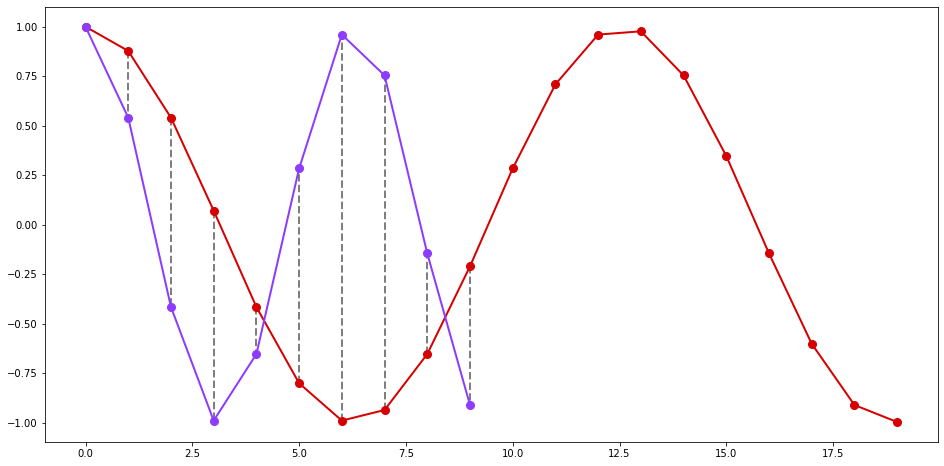

In [4]:
# This is how Euclidian distance would look like
straight_path = list(zip(range(n_x), range(n_y)))

# Prepare figure
fig, ax = plt.subplots(figsize=(16,8))

# Plot connections
for [map_x, map_y] in straight_path:
    ax.plot([map_x, map_y], [x[map_x], y[map_y]], '--k', linewidth=2, alpha=.5)

# Plot series
ax.plot(x, '-o', label='x', linewidth=2, markersize=8, color=colors[0], markerfacecolor=colors[0], markeredgecolor=colors[0])
ax.plot(y, '-o', label='y', linewidth=2, markersize=8, color=colors[1], markerfacecolor=colors[1], markeredgecolor=colors[1])
fig.savefig('../figures/figure_2', dpi=900, bbox_inches='tight')

In [5]:
# Euclidian distances from cosine to straight, and cosine to cosine
print("Euclidian: straight to cos wave ", np.linalg.norm(z[0:10]-y))
print("Euclidian: cos to cos waves ", np.linalg.norm(x[0:10]-y))

Euclidian: straight to cos wave  2.3009842102039255
Euclidian: cos to cos waves  3.2857320754267176


C:\Users\azael\Miniconda3\envs\article1\lib\site-packages\tslearn\bases\bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


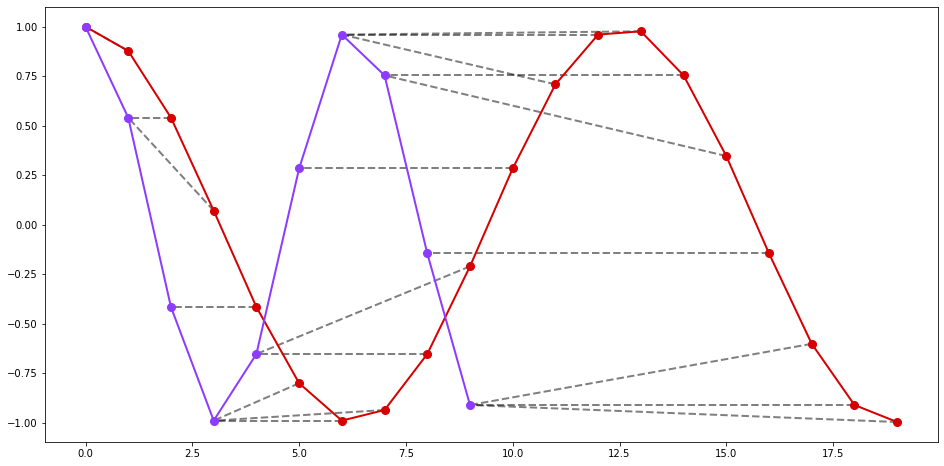

In [6]:
# This is how DTW match up the correct points
from tslearn.metrics import dtw_path # DTW implementation

optimal_path = dtw_path(x,y)[0] # Find optimal set of connections

# Prepare figure
fig, ax = plt.subplots(figsize=(16,8))

# Plot connections
for [map_x, map_y] in optimal_path:
    ax.plot([map_x, map_y], [x[map_x], y[map_y]], '--k', linewidth=2, alpha=.5)

# Plot figures
ax.plot(x, '-o', label='x', linewidth=2, markersize=8, color=colors[0], markerfacecolor=colors[0], markeredgecolor=colors[0])
ax.plot(y, '-o', label='y', linewidth=2, markersize=8, color=colors[1], markerfacecolor=colors[1], markeredgecolor=colors[1])
fig.savefig('../figures/figure_3', dpi=900, bbox_inches='tight')

> Disclaimer: TSLearn doesn't implement the full euclidean distance, instead it uses the squared version of it. While this may have implications on some applications, in general, this distance will work pretty well.

In [7]:
# DTW distances from cosine to straight, and cosine to cosine
print("DTW: straight to cos wave ", dtw_path(z,y)[1])
print("DTW: cos to cos waves ", dtw_path(x,y)[1])

DTW: straight to cos wave  2.3009842102039255
DTW: cos to cos waves  0.8958054218527466


Notice that this time DTW shows that the cosine waves are closer together than with the straight line. Another, more useful way to visualize this matching of points (which is formally called warping path) is drawing it over the distance matrix of the time series. Let's do that.

In [8]:
def get_distance_matrix(x, y):
    """ Create an euclidean distance matrix
    dist[i,j] Euclidean distance between point x_i and y_j
    """
    dist = np.zeros((y.shape[0], x.shape[0]))
    for i in range(y.shape[0]):
        for j in range(x.shape[0]):
            dist[i,j] = np.linalg.norm(x[j] - y[i])
    return dist

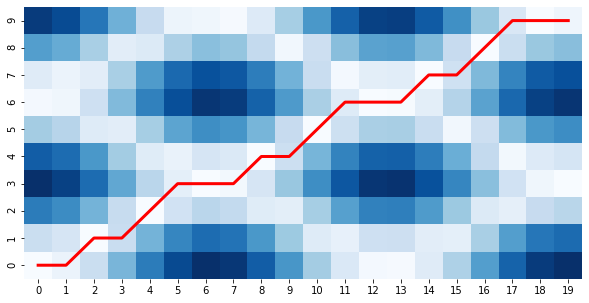

In [9]:
# Input
distances = get_distance_matrix(x, y)
output = dtw_path(x,y)
optimal_path, dtw_distance = output[0], output[1]

# Plot
fig, ax = plt.subplots(figsize=(10,5))

# Warping path
ax.plot([xx+.5 for (xx, yy) in optimal_path], 
             [yy+.5 for (xx, yy) in optimal_path], 
             "r-", linewidth=3.)
# Distance matrix
sns.heatmap(distances, 
            ax=ax, cmap="Blues", cbar=False)
ax.invert_yaxis()

The interpretation here is in the flat lines which represent the points where they are matched 'one to many'. Some times this curves might "curve" way too much so one can set restrictions. A good place to start is reading https://dynamictimewarping.github.io/ this. Is the site of the library implemented by Giorgino which packages many restrictions and variations of the original DTW algorithm.